<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch02_optimality_condition_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

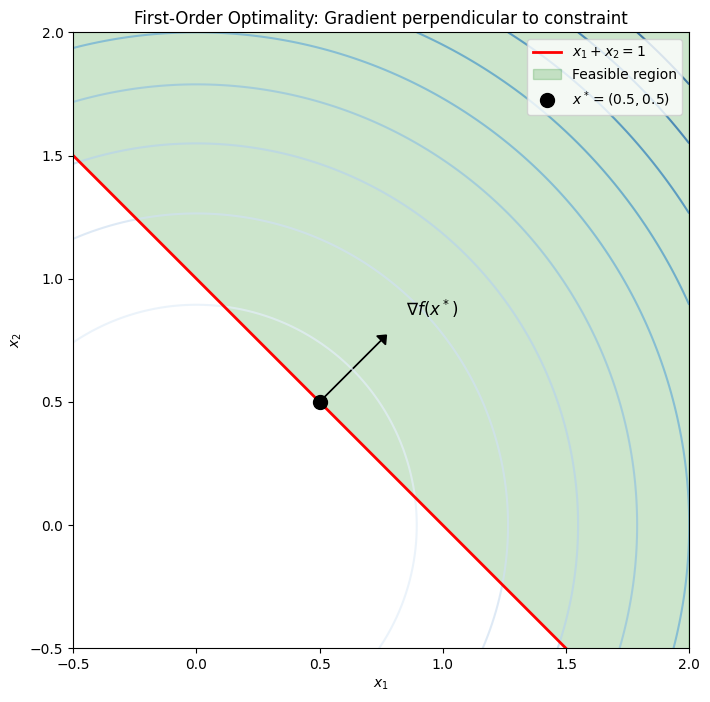

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective: f(x) = 0.5 * ||x||^2
def f(x):
    return 0.5 * np.sum(x**2)

def grad_f(x):
    return x

# Feasible set: x1 + x2 >= 1 (region above the line)
# Constrained optimum: closest point to origin on the line x1 + x2 = 1

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot contours of objective
x1 = np.linspace(-0.5, 2, 100)
x2 = np.linspace(-0.5, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5 * (X1**2 + X2**2)
ax.contour(X1, X2, Z, levels=10, cmap='Blues', alpha=0.7)

# Plot constraint boundary
ax.plot(x1, 1 - x1, 'r-', linewidth=2, label='$x_1 + x_2 = 1$')
ax.fill_between(x1, 1 - x1, 2, alpha=0.2, color='green', label='Feasible region')

# Optimal point
x_star = np.array([0.5, 0.5])
ax.plot(*x_star, 'ko', markersize=10, label=f'$x^* = (0.5, 0.5)$')

# Gradient at optimal point
grad = grad_f(x_star)
ax.arrow(x_star[0], x_star[1], grad[0]*0.5, grad[1]*0.5, head_width=0.05, head_length=0.03, fc='black', ec='black')
ax.text(x_star[0] + 0.35, x_star[1] + 0.35, r'$\nabla f(x^*)$', fontsize=12)
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 2)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')
ax.legend()
ax.set_title('First-Order Optimality: Gradient perpendicular to constraint')
plt.savefig('optimality_condition.pdf', bbox_inches='tight')
plt.show()